In [1]:
import sys
sys.path.append(".\mrcnn_demo")
from m_rcnn import *
%matplotlib inline

images_path = "dataset.zip"
annotations_path = "annotations.json"

dataset_train = load_image_dataset(os.path.join("./", annotations_path), "./dataset", "train")
dataset_val = load_image_dataset(os.path.join("./", annotations_path), "./dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))


# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

Annotation json path:  ./annotations.json
Annotation json path:  ./annotations.json
Train: 39
Validation: 4
Classes: 1
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
C:\Users\micha\maskrcnn_colab\mask_rcnn_coco.h5


In [2]:
train_head(model, dataset_train, dataset_val, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: C:\Users\micha\maskrcnn_colab\logs\object20221017T0026\mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_de

Loading weights from  C:\Users\micha\maskrcnn_colab\logs\object20221017T0026\mask_rcnn_object_0010.h5
Re-starting from epoch 10
original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int32
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


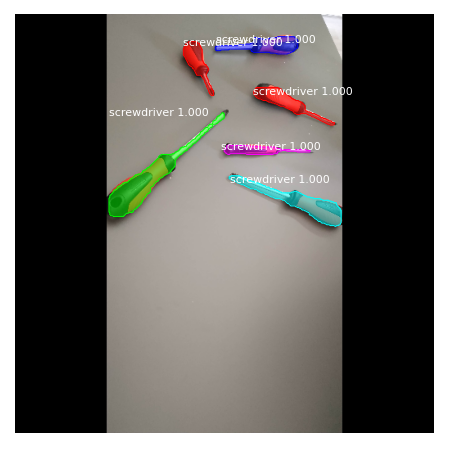

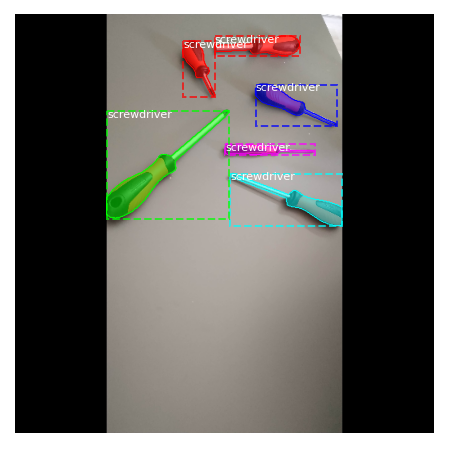

In [6]:
test_model, inference_config = load_test_model(class_number)

test_random_image(test_model, dataset_val, inference_config)